In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [6]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

dont run the next cell

In [5]:
with open("../longest_spatial_uniform_25_scale.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"][:12][:]
C_paths_M = M_res["C_paths"][:12][:]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]

with open("../longest_spatial_uniform_25_scale_2.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M2 = M_res["Q_paths"]
C_paths_M2 = M_res["C_paths"]
Q_paths_B2 = B_res["Q_paths"]
C_paths_B2 = B_res["C_paths"]

with open("../longest_spatial_uniform_25_scale_3.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M3 = M_res["Q_paths"]
C_paths_M3 = M_res["C_paths"]
Q_paths_B3 = B_res["Q_paths"]
C_paths_B3 = B_res["C_paths"]

Q_paths_M = Q_paths_M + Q_paths_M2 + Q_paths_M3
C_paths_M = C_paths_M + C_paths_M2 + C_paths_M3
Q_paths_B = Q_paths_B + Q_paths_B2 + Q_paths_B3
C_paths_B = C_paths_B + C_paths_B2 + C_paths_B3

with open("../longest_spatial_uniform_25_scale_all_good.pkl", 'wb') as f:
    M_res = {"Q_paths": Q_paths_M, "C_paths": C_paths_M}
    B_res = {"Q_paths": Q_paths_B, "C_paths": C_paths_B}
    pickle.dump([M_res,B_res, N, W, pmf_cust, pmf_serv ], f)

Expected cost for c = 0 case: 385.68
[[141.42135624 223.60679775 316.22776602 412.31056256 509.90195136
  223.60679775 282.84271247 360.55512755 447.2135955  538.51648071
  316.22776602 360.55512755 424.26406871 500.         583.09518948
  412.31056256 447.2135955  500.         565.68542495 640.31242374
  509.90195136 538.51648071 583.09518948 640.31242374 707.10678119]
 [223.60679775 141.42135624 223.60679775 316.22776602 412.31056256
  282.84271247 223.60679775 282.84271247 360.55512755 447.2135955
  360.55512755 316.22776602 360.55512755 424.26406871 500.
  447.2135955  412.31056256 447.2135955  500.         565.68542495
  538.51648071 509.90195136 538.51648071 583.09518948 640.31242374]
 [316.22776602 223.60679775 141.42135624 223.60679775 316.22776602
  360.55512755 282.84271247 223.60679775 282.84271247 360.55512755
  424.26406871 360.55512755 316.22776602 360.55512755 424.26406871
  500.         447.2135955  412.31056256 447.2135955  500.
  583.09518948 538.51648071 509.90195136

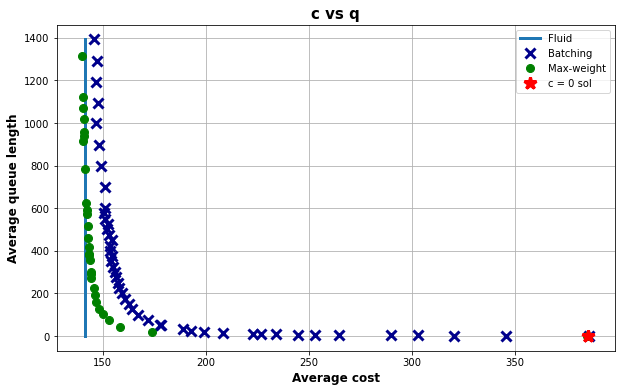

In [7]:
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, 0)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, 0)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

In [3]:
with open("../longest_spatial_uniform_25_scale_3.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)

Expected cost for c = 0 case: 385.68
[[141.42135624 223.60679775 316.22776602 412.31056256 509.90195136
  223.60679775 282.84271247 360.55512755 447.2135955  538.51648071
  316.22776602 360.55512755 424.26406871 500.         583.09518948
  412.31056256 447.2135955  500.         565.68542495 640.31242374
  509.90195136 538.51648071 583.09518948 640.31242374 707.10678119]
 [223.60679775 141.42135624 223.60679775 316.22776602 412.31056256
  282.84271247 223.60679775 282.84271247 360.55512755 447.2135955
  360.55512755 316.22776602 360.55512755 424.26406871 500.
  447.2135955  412.31056256 447.2135955  500.         565.68542495
  538.51648071 509.90195136 538.51648071 583.09518948 640.31242374]
 [316.22776602 223.60679775 141.42135624 223.60679775 316.22776602
  360.55512755 282.84271247 223.60679775 282.84271247 360.55512755
  424.26406871 360.55512755 316.22776602 360.55512755 424.26406871
  500.         447.2135955  412.31056256 447.2135955  500.
  583.09518948 538.51648071 509.90195136

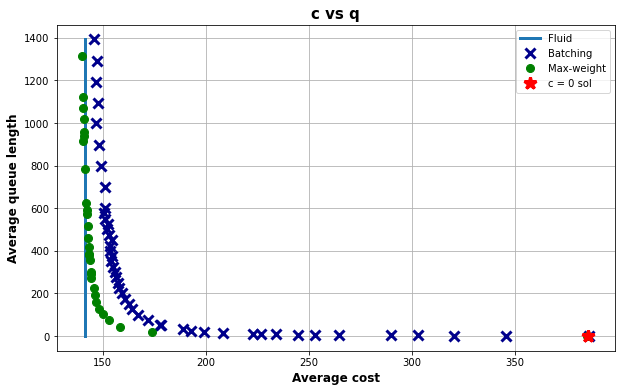

In [4]:
plot_from_sim_paths("../longest_spatial_uniform_25_scale_all_good.pkl")

In [ ]:
file_name = "../longest_spatial_uniform_25_scale_all_good.pkl"
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(avg_C_M, avg_Q_M) = utils.average_paths(C_paths_M,Q_paths_M)
(avg_C_B, avg_Q_B) = utils.average_paths(C_paths_B,Q_paths_B)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
plt.figure( figsize=(10,6) ) 


In [ ]:
plt.figure( figsize=(10,6) ) 

# C = 0 Case

# C = Inf/Fluid Case
ylim = max( max( avg_Q_B ), max( avg_Q_M ) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(avg_C_B,avg_Q_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average Queue Length", weight='bold',fontsize=14)
plt.xlabel("Average Cost", weight='bold',fontsize=14)
plt.title("Average Queue Length vs Average Cost", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'],fontsize=14)
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)
plt.savefig("../september-report-plots/spatial-5-qc-plot.jpg",bbox_inches='tight')
plt.show()

yay it worked

In [3]:
with open("../longest_spatial_uniform_25_scale_all_good.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]

In [4]:
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, 0)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, 0)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)

Expected cost for c = 0 case: 385.68
[[141.42135624 223.60679775 316.22776602 412.31056256 509.90195136
  223.60679775 282.84271247 360.55512755 447.2135955  538.51648071
  316.22776602 360.55512755 424.26406871 500.         583.09518948
  412.31056256 447.2135955  500.         565.68542495 640.31242374
  509.90195136 538.51648071 583.09518948 640.31242374 707.10678119]
 [223.60679775 141.42135624 223.60679775 316.22776602 412.31056256
  282.84271247 223.60679775 282.84271247 360.55512755 447.2135955
  360.55512755 316.22776602 360.55512755 424.26406871 500.
  447.2135955  412.31056256 447.2135955  500.         565.68542495
  538.51648071 509.90195136 538.51648071 583.09518948 640.31242374]
 [316.22776602 223.60679775 141.42135624 223.60679775 316.22776602
  360.55512755 282.84271247 223.60679775 282.84271247 360.55512755
  424.26406871 360.55512755 316.22776602 360.55512755 424.26406871
  500.         447.2135955  412.31056256 447.2135955  500.
  583.09518948 538.51648071 509.90195136

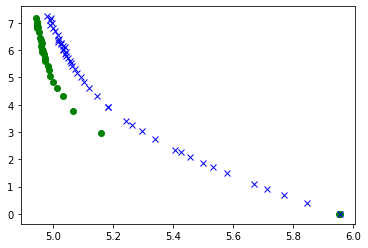

In [15]:
plt.plot(np.log(average_cost_M), np.log(average_queue_M), 'go')
plt.plot(np.log(average_cost_B), np.log(average_queue_B), 'bx')

In [ ]:
length(average_queue_M)

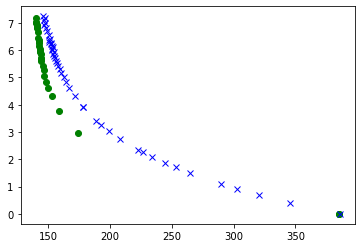

In [16]:
plt.plot(average_cost_M, np.log(average_queue_M), 'go')
plt.plot(average_cost_B, np.log(average_queue_B), 'bx')

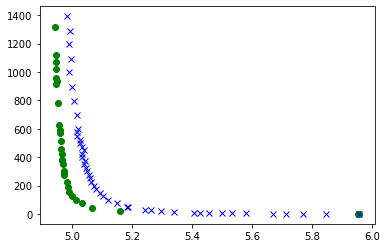

In [18]:
plt.plot(np.log(average_cost_M), (average_queue_M), 'go')
plt.plot(np.log(average_cost_B), (average_queue_B), 'bx')

In [12]:
# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_M)

# Sort x and reorder y accordingly
average_cost_M = average_cost_M[sorted_indices]
average_queue_M = average_queue_M[sorted_indices]

In [13]:
# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_B)

# Sort x and reorder y accordingly
average_cost_B = average_cost_B[sorted_indices]
average_queue_B = average_queue_B[sorted_indices]

[-44.60032512 227.50683546] [0.12100981]
[-18.90521291 101.27808061] [0.48541415]


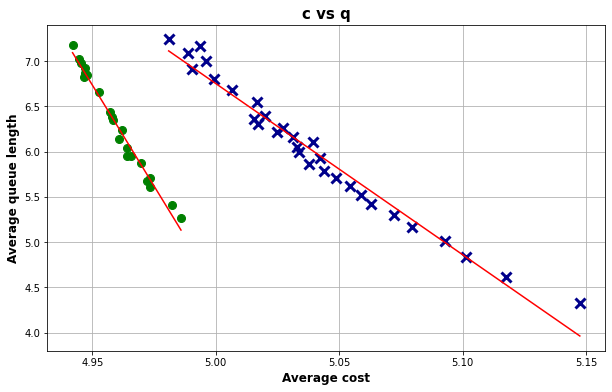

In [14]:
# Polynomial fit
deg = 1
xM = np.log(average_cost_M[:22])
yM = np.log(average_queue_M[:22])
xB = np.log(average_cost_B[:30])
yB = np.log(average_queue_B[:30])



p, res, _, _, _ = np.polyfit(xM, yM, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM, yM,'go',markersize = 8)
predict = np.poly1d(p)
x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB, yB, 1, full=True)
print(pB,resB)
predict2 = np.poly1d(pB)
x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'r')
 
 

[-12.00606506  64.8152513 ] [0.09267759]
[-5.06580151 29.88556831] [0.42895631]


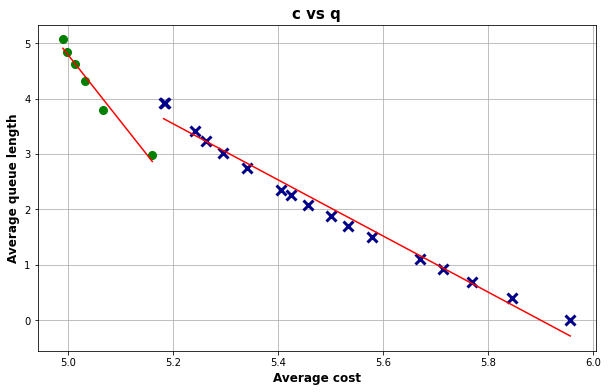

In [15]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[22:28])
yM2 = np.log(average_queue_M[22:28])
xB2 = np.log(average_cost_B[30:])
yB2 = np.log(average_queue_B[30:])



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'r')
 
 

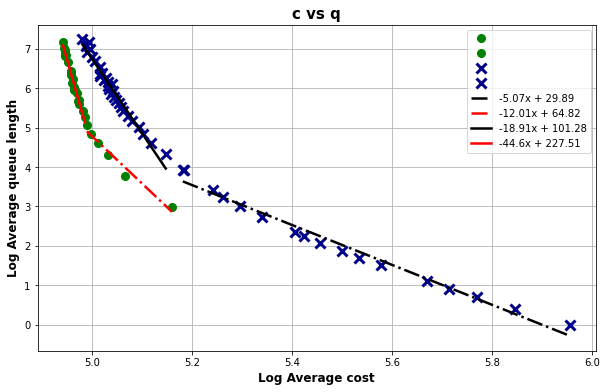

In [30]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel("Log Average queue length", weight='bold',fontsize=12)
plt.xlabel("Log Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
            str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])

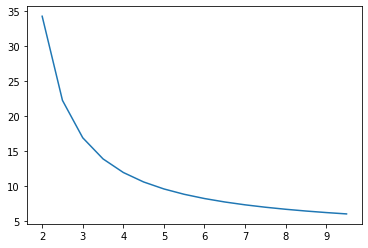

In [70]:
x = np.arange(2,10,0.5)
y = 25/(x-1.2) + 3
plt.plot(x,y)

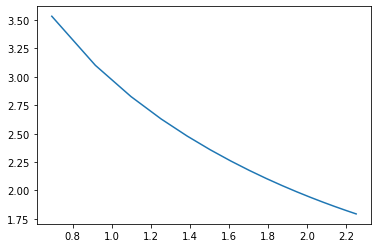

In [71]:
plt.plot(np.log(x),np.log(y))

In [54]:
from scipy.optimize import curve_fit
def model_func(x, a, b, c, k):
    return a + b /(x - c) + k

In [55]:
# Fit maxweight
x_data = average_cost_M[:29]
y_data = average_queue_M[:29]
initial_guess = [1, 5, 1, 1]  # Initial guess for [a, b, c, d]
popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guess)
print(popt)
print(pcov)

[ -42.79743737 2615.84781583  138.26392705  -54.11827303]
[[ 7.56533460e+17 -1.47020661e+04  9.13619622e+00 -7.56533459e+17]
 [-1.49584548e+04  4.80757324e+04 -3.19488387e+01  1.00262726e+04]
 [ 1.04487973e+01 -3.19488387e+01  2.29644049e-02 -7.48964603e+00]
 [-7.56533459e+17  9.76988385e+03 -7.10593039e+00  7.56533458e+17]]


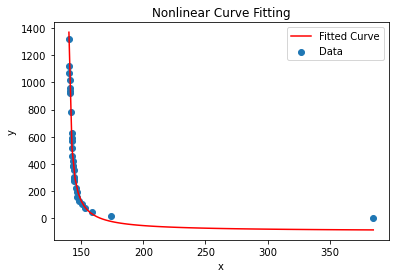

In [51]:
a_opt, b_opt, c_opt, k_opt = popt
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = model_func(x_fit, *popt)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Curve Fitting')
plt.show()

In [52]:
def model_func(x, a, b, c):
    y = np.exp(b - a*(x-c))
    return y

# Fit maxweight
x_data = average_cost_M
y_data = average_queue_M
initial_guess = [1, 1, 1]  # Initial guess for [a, b, c, d]
popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guess)
print(popt)
print(pcov)

[1. 1. 1.]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


c:\Users\HP\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [47]:
len(x_data)

30

In [15]:
average_cost_M

array([385.09327611, 144.3653183 , 143.17486949, 142.18670859,
       141.55857178, 140.70093073, 140.88102506, 140.75148812,
       140.74925206, 140.50154474, 140.43884223, 140.04874273,
       385.49305862, 174.18423902, 158.4621815 , 153.34004871,
       150.27443748, 148.13764017, 146.91445922, 146.33746325,
       145.82120796, 144.50718305, 144.53474763, 144.00715434,
       143.37768132, 143.18008899, 142.72869867, 142.89997001,
       142.37319506, 142.28946203])

### Linear, High Queue, c - cstar

In [8]:
with open("../longest_spatial_uniform_25_scale_all_good.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)

NameError: name 'C_paths_M' is not defined

In [9]:
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_B)

# Sort x and reorder y accordingly
average_cost_B = average_cost_B[sorted_indices]
average_queue_B = average_queue_B[sorted_indices]

# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_M)

# Sort x and reorder y accordingly
average_cost_M = average_cost_M[sorted_indices]
average_queue_M = average_queue_M[sorted_indices]

In [10]:
[Ex,fluid_sol] = run_extremes(N, W, pmf_cust, pmf_serv)

Expected cost for c = 0 case: 385.68
[[141.42135624 223.60679775 316.22776602 412.31056256 509.90195136
  223.60679775 282.84271247 360.55512755 447.2135955  538.51648071
  316.22776602 360.55512755 424.26406871 500.         583.09518948
  412.31056256 447.2135955  500.         565.68542495 640.31242374
  509.90195136 538.51648071 583.09518948 640.31242374 707.10678119]
 [223.60679775 141.42135624 223.60679775 316.22776602 412.31056256
  282.84271247 223.60679775 282.84271247 360.55512755 447.2135955
  360.55512755 316.22776602 360.55512755 424.26406871 500.
  447.2135955  412.31056256 447.2135955  500.         565.68542495
  538.51648071 509.90195136 538.51648071 583.09518948 640.31242374]
 [316.22776602 223.60679775 141.42135624 223.60679775 316.22776602
  360.55512755 282.84271247 223.60679775 282.84271247 360.55512755
  424.26406871 360.55512755 316.22776602 360.55512755 424.26406871
  500.         447.2135955  412.31056256 447.2135955  500.
  583.09518948 538.51648071 509.90195136

In [11]:
Cstar = fluid_sol["Cost"]
print(Cstar)

141.42135625376247


[-0.60748325  6.33687489] [0.06436491]
[-1.54980768  9.82082583] [0.56502571]


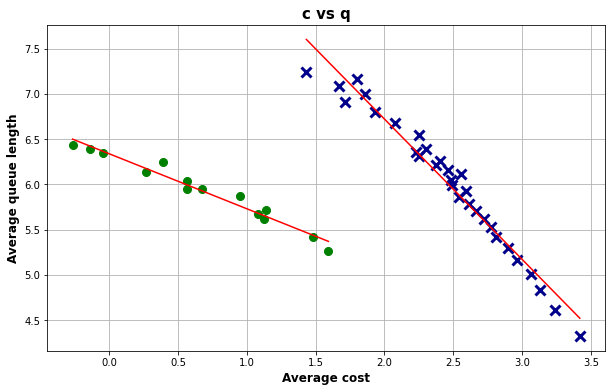

In [12]:
# Polynomial fit
deg = 1
xM = np.log(average_cost_M[8:22]- Cstar)
yM = np.log(average_queue_M[8:22])
xB = np.log(average_cost_B[:30]- Cstar)
yB = np.log(average_queue_B[:30])



p, res, _, _, _ = np.polyfit(xM, yM, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM, yM,'go',markersize = 8)
predict = np.poly1d(p)
x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB, yB, 1, full=True)
print(pB,resB)
predict2 = np.poly1d(pB)
x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'r')

[-1.17393242  7.12214476] [0.02007306]
[-2.05362538 11.35739481] [0.01372079]


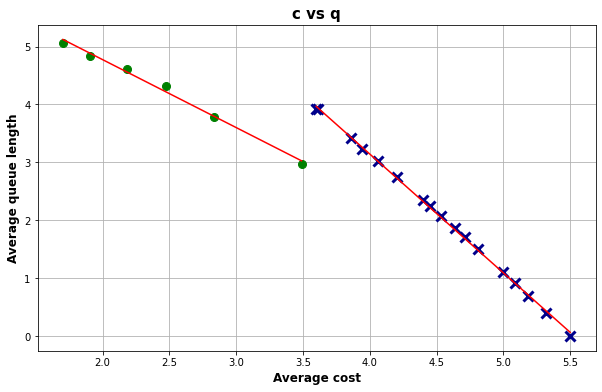

In [13]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[22:28]- Cstar)
yM2 = np.log(average_queue_M[22:28])
xB2 = np.log(average_cost_B[30:]- Cstar)
yB2 = np.log(average_queue_B[30:])



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'r')


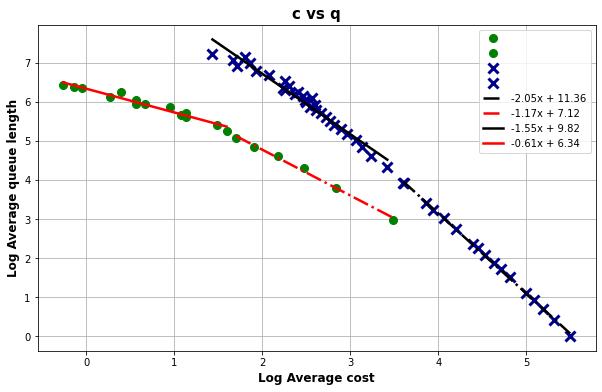

In [14]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel("Log Average queue length", weight='bold',fontsize=12)
plt.xlabel("Log Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
            str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])

### Plot for report

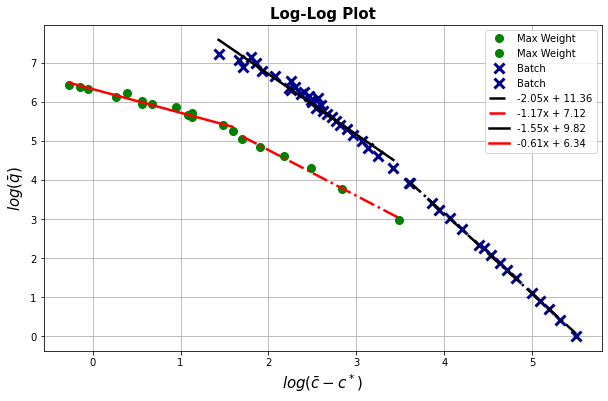

In [21]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

plt.legend(["Max Weight","Max Weight","Batch","Batch",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
            str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])

plt.savefig("../september-report-plots/spatial-5-log-log-plot.jpg",bbox_inches='tight')

plt.show()

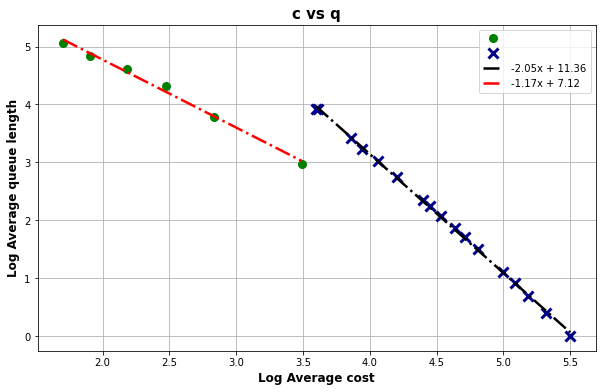

In [16]:
plt.figure( figsize=(10,6) )

# plt.plot(xM, yM,'go',markersize = 8)
plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel("Log Average queue length", weight='bold',fontsize=12)
plt.xlabel("Log Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
# plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
# plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
# plt.plot(x, y,'r', linewidth=2.5)

# plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
#             str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])
plt.legend(["","", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)), str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2))])

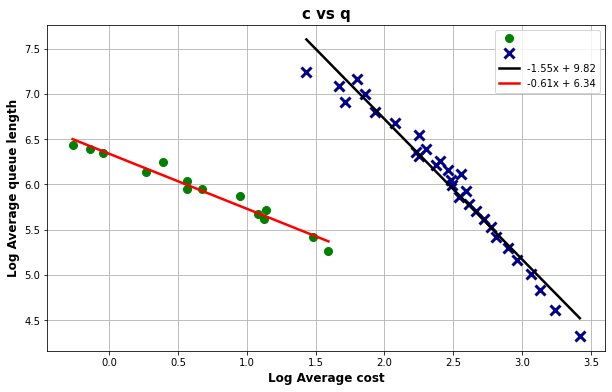

In [46]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
# plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel("Log Average queue length", weight='bold',fontsize=12)
plt.xlabel("Log Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
 #plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
#plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
#plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

# plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
#             str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])
plt.legend(["","", str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])

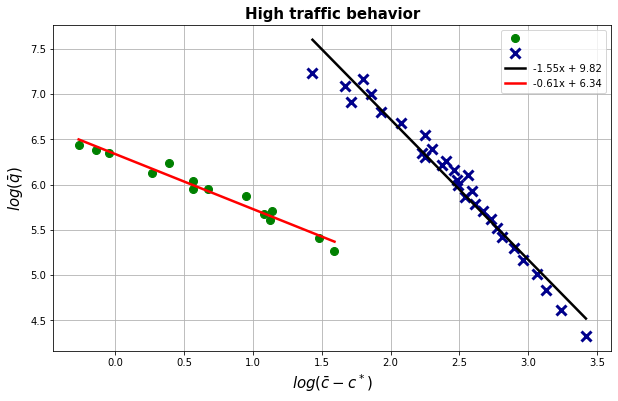

In [22]:
plt.figure( figsize=(10,6) )

plt.plot(xM, yM,'go',markersize = 8)
# plt.plot(xM2, yM2,'go',markersize = 8)
plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("High traffic behavior", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB, yB,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
 #plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")

predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
#plt.plot(x, y,'k-.', linewidth=2.5)

x  = np.array(xM2)
y = predict_2(x)
#plt.plot(x, y,'r-.', linewidth=2.5)

x  = np.array(xB)
y = predict2(x)
plt.plot(x, y,'k', linewidth=2.5)

x  = np.array(xM)
y = predict(x)
plt.plot(x, y,'r', linewidth=2.5)

# plt.legend(["","","","",str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)),str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),
#             str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])
plt.legend(["","", str(round(predict2[1],2))+"x + " + str(round(predict2[0],2)),str(round(predict[1],2))+"x + " + str(round(predict[0],2))])
plt.savefig("../september-report-plots/spatial-5-high-traffic.jpg",bbox_inches='tight')

plt.show()